In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.tseries.offsets import Hour, Week, Day

%matplotlib inline 

In [2]:
path = './data/ap-northeast-1.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True, names=['arch', 'os', 'source', 'val'])

In [3]:
df = df[(df['arch'].str.startswith('i') & (df['os'] == 'Windows'))]

In [4]:
df['arch'].unique()

array(['i2.xlarge', 'i3.xlarge', 'i2.4xlarge', 'i2.2xlarge',
       'i3.16xlarge', 'i3.2xlarge', 'i3.4xlarge', 'i3.large',
       'i2.8xlarge', 'i3.8xlarge'], dtype=object)

In [5]:
df['os'].unique()

array(['Windows'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22846 entries, 2017-05-08 21:45:01+00:00 to 2017-03-30 07:36:21+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   arch    22846 non-null  object 
 1   os      22846 non-null  object 
 2   source  22846 non-null  object 
 3   val     22846 non-null  float64
dtypes: float64(1), object(3)
memory usage: 892.4+ KB


In [7]:
df

,arch,os,source,val
2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2120
2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2120
2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210
2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.2200
2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.2200
...,...,...,...,...
2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198
2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195
2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164
2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162


In [8]:
df[['inst_gen', 'inst_type']] = df['arch'].str.split('.', n = 1, expand = True)

In [9]:
df

,arch,os,source,val,inst_gen,inst_type
2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2120,i2,xlarge
2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2120,i2,xlarge
2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210,i2,xlarge
2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1a,0.2200,i3,xlarge
2017-05-08 21:39:07+00:00,i3.xlarge,Windows,ap-northeast-1c,0.2200,i3,xlarge
...,...,...,...,...,...,...
2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198,i2,xlarge
2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195,i2,xlarge
2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164,i2,xlarge
2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162,i2,xlarge


In [18]:
df[df['arch'] == 'i2.xlarge'].sort_index()

,arch,os,source,val,inst_gen,inst_type
2017-03-30 07:36:21+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2157,i2,xlarge
2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162,i2,xlarge
2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164,i2,xlarge
2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195,i2,xlarge
2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198,i2,xlarge
...,...,...,...,...,...,...
2017-05-08 21:36:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210,i2,xlarge
2017-05-08 21:36:11+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2231,i2,xlarge
2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210,i2,xlarge
2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2120,i2,xlarge


In [10]:
print(df.index[0])
df.index[0] + Hour(12)

2017-05-08 21:45:01+00:00


Timestamp('2017-05-09 09:45:01+0000', tz='UTC')

In [54]:
df2 = df[df['arch'] == 'i2.xlarge'].sort_index()
df2

,arch,os,source,val,inst_gen,inst_type
2017-03-30 07:36:21+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2157,i2,xlarge
2017-03-30 07:45:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2162,i2,xlarge
2017-03-30 07:46:27+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2164,i2,xlarge
2017-03-30 07:47:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2195,i2,xlarge
2017-03-30 07:48:27+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2198,i2,xlarge
...,...,...,...,...,...,...
2017-05-08 21:36:01+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210,i2,xlarge
2017-05-08 21:36:11+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2231,i2,xlarge
2017-05-08 21:42:29+00:00,i2.xlarge,Windows,ap-northeast-1a,0.2210,i2,xlarge
2017-05-08 21:45:01+00:00,i2.xlarge,Windows,ap-northeast-1c,0.2120,i2,xlarge


In [55]:
df2.resample('D').mean()


,val
2017-03-30 00:00:00+00:00,0.220598
2017-03-31 00:00:00+00:00,0.219764
2017-04-01 00:00:00+00:00,0.217717
2017-04-02 00:00:00+00:00,0.217706
2017-04-03 00:00:00+00:00,0.220792
2017-04-04 00:00:00+00:00,0.219999
2017-04-05 00:00:00+00:00,0.213775
2017-04-06 00:00:00+00:00,0.218083
2017-04-07 00:00:00+00:00,0.230182
2017-04-08 00:00:00+00:00,0.216144


In [74]:
df.sort_index(inplace=True)

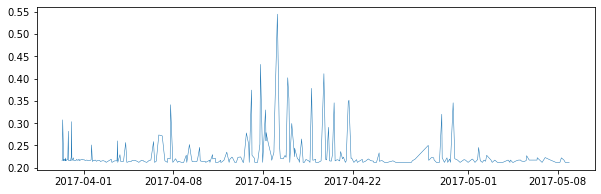

In [25]:
plt.figure(figsize=(10, 3))
plt.plot(df2.index, df2['val'], linewidth=0.5)

In [89]:
day = df.index.min()
days = []

while day < df.index.max():
    day += Day(1)
    days.append(day)

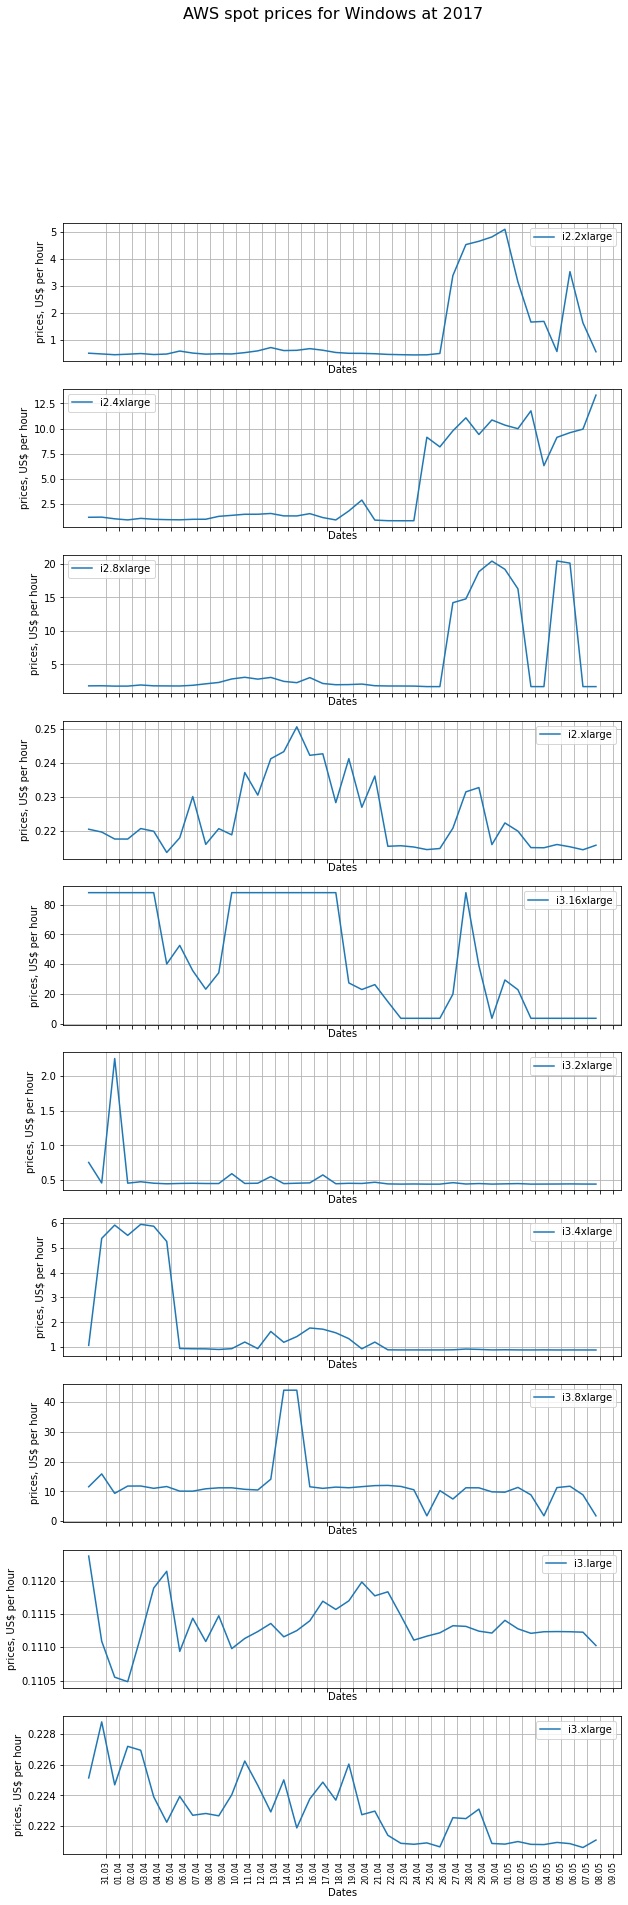

In [116]:
grp_array = np.sort(df['arch'].unique())
axs_row = len(grp_array)
fig, axs = plt.subplots(ncols=1, nrows=axs_row, sharex=True,  figsize=(10, 3*axs_row))
fig.suptitle('AWS spot prices for Windows at 2017', fontsize=16)

for i, ax in enumerate(axs):
    tmp_df = df[df['arch'] == grp_array[i]]
    tmp_df = tmp_df.resample('D').mean()
    ax.plot(tmp_df.index, tmp_df['val'], label=grp_array[i])
#     ax.set_title("aws spot prices for {}".format(grp_array[i]))
    ax.legend(loc='best')
    ax.set_xticks(days)
    ax.set_xticklabels(
        [pd.to_datetime(str(date)).strftime('%d.%m') for date in days], 
        rotation=90,
        fontsize=8
    )
    ax.grid()

plt.setp(axs, xlabel='Dates', ylabel='prices, US$ per hour')

plt.show()

In [75]:
week = df.index.min()
weeks = []

while week < df.index.max():
    week += Week()
    weeks.append(week)

weeks

[Timestamp('2017-04-06 07:36:21+0000', tz='UTC'),
 Timestamp('2017-04-13 07:36:21+0000', tz='UTC'),
 Timestamp('2017-04-20 07:36:21+0000', tz='UTC'),
 Timestamp('2017-04-27 07:36:21+0000', tz='UTC'),
 Timestamp('2017-05-04 07:36:21+0000', tz='UTC'),
 Timestamp('2017-05-11 07:36:21+0000', tz='UTC')]

In [137]:
ts = pd.Timestamp(2017, 1, 1)
ts.is_month_start

True